## 2.4 Exercises

# 2. Explain whether each scenario is a classification or regression problem, and indicate whether we are most interested in inference or prediction. Finally, provide n or p. 

* (a). We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

This is an example of a Regression problem as the aim is to predicting a continous value (CEO salary), n.

* (b). We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.
    
This is a binary Classification task as the aim is to predict whether the product will be a success or a failure (1 or 0), p.

* (c). We are interested in predicting the % change in the US Dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the USD/Euro, the % change in the US market, the % change in the British market, and the % change in the German market.
    
This is a Regression problem as % change is a continuous and not discrete outcome, p.

In [2]:
if (!require("MASS")) {
    install.packages("MASS")
    library(MASS)
}
if (!require("ggplot2")) {
    install.packages("ggplot2")
    library(ggplot2)
}
if (!require("dplyr")) {
    install.packages("dplyr")
    library(ggplot2)
}
if (!require("ISLR")) {
    install.packages("ISLR")
    library(ggplot2)
}

Loading required package: MASS

Loading required package: ggplot2

Loading required package: dplyr


Attaching package: 'dplyr'


The following object is masked from 'package:MASS':

    select


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: ISLR



In [3]:
?Boston
dim(Boston)

[1] 506  14

* 10. How many rows are in this data set? How many columns? What do the rows and columns represent?
    (a). 
        
        This data set contains 506 rows and 14 columns. The rows each represent a different house in the suburbs of Boston, Massachusets. On the other hand, the columns each represent a particular attribute of the specific area which the house is located in.
    
   * (b). Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.

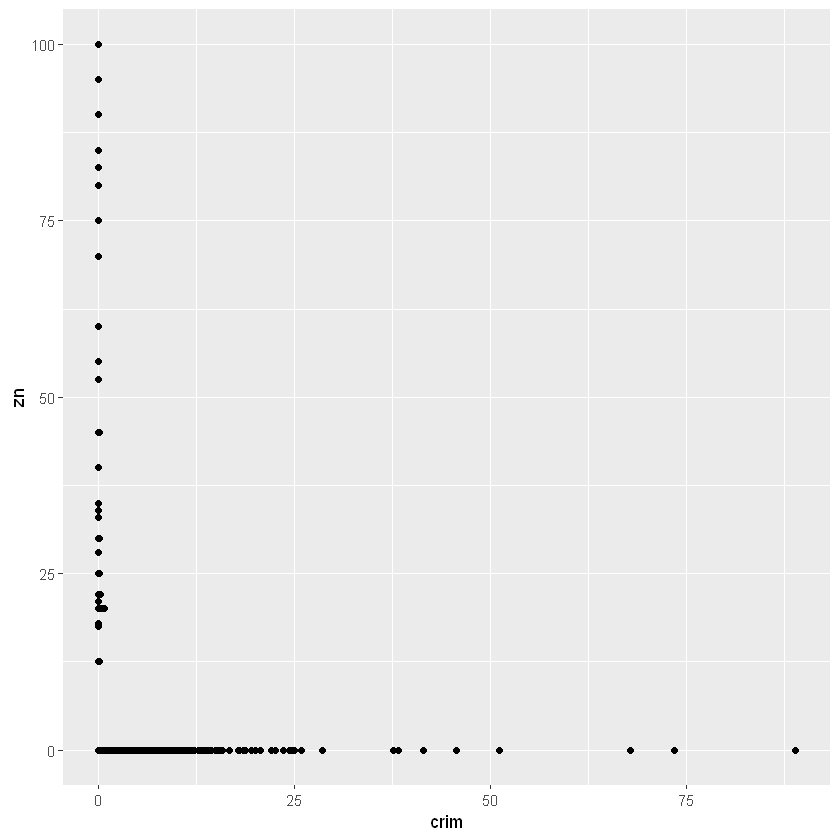

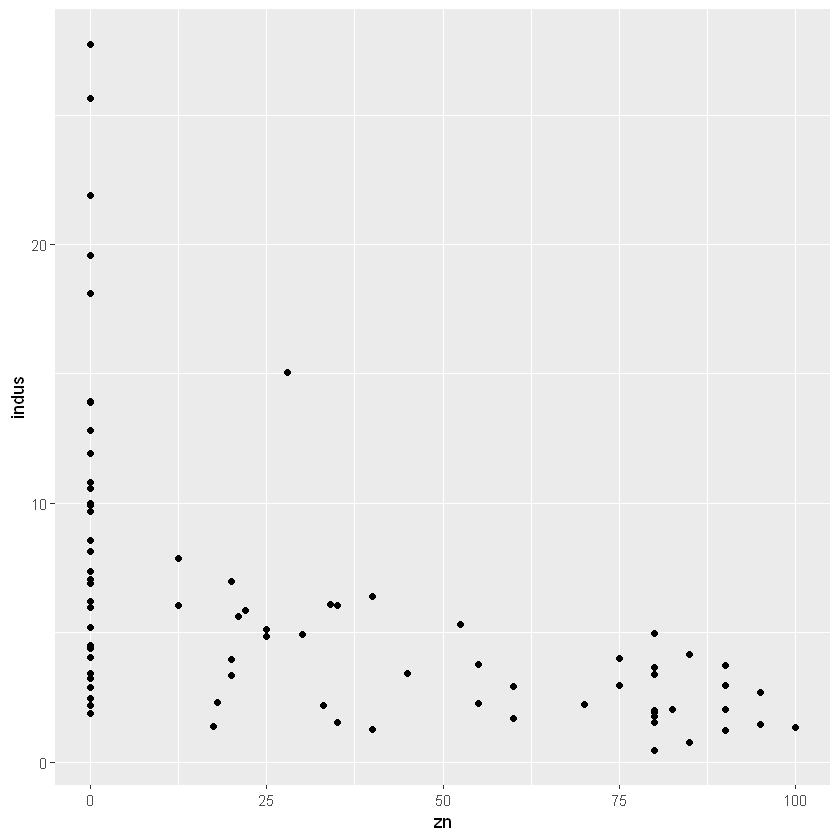

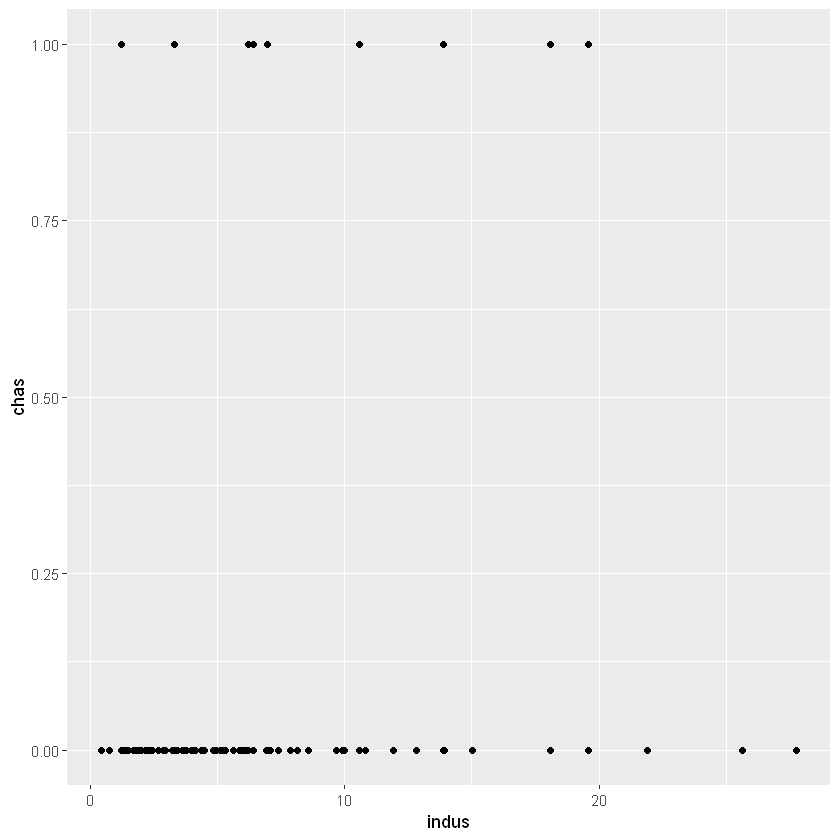

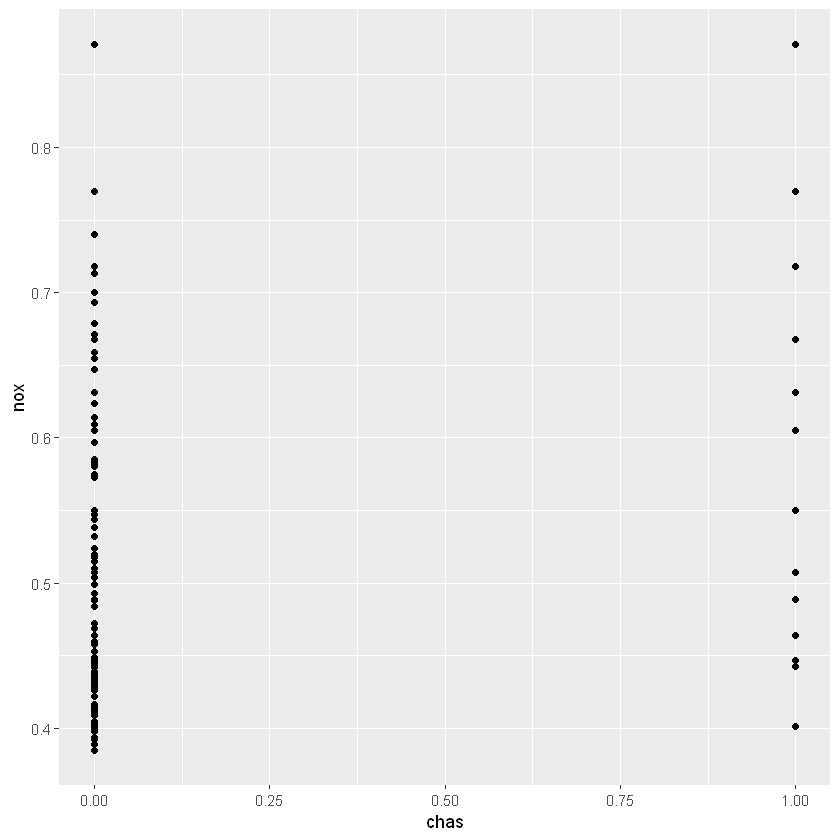

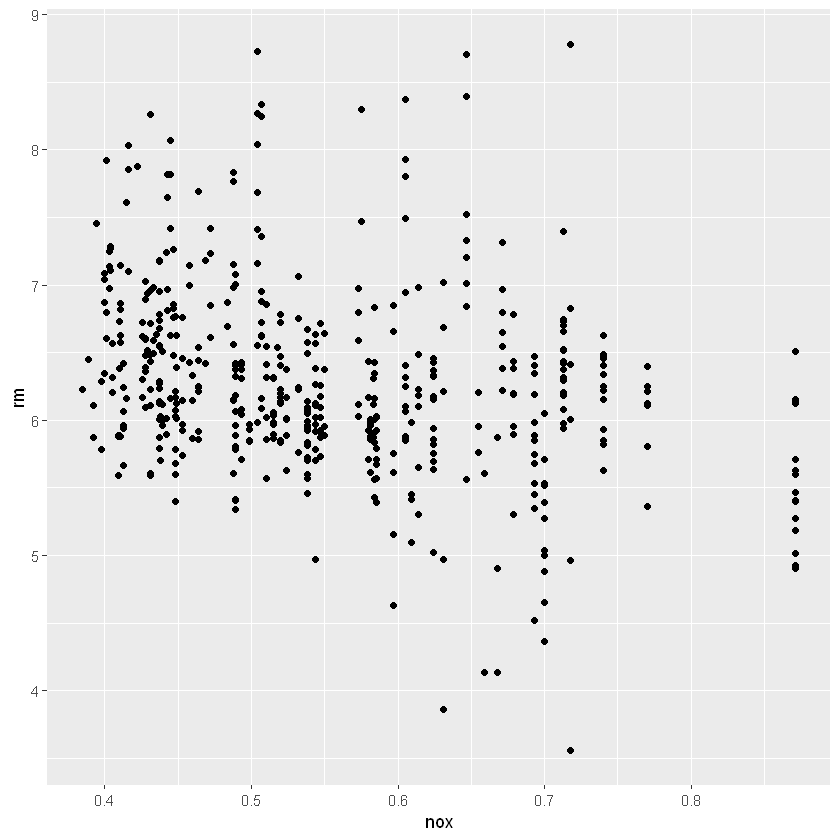

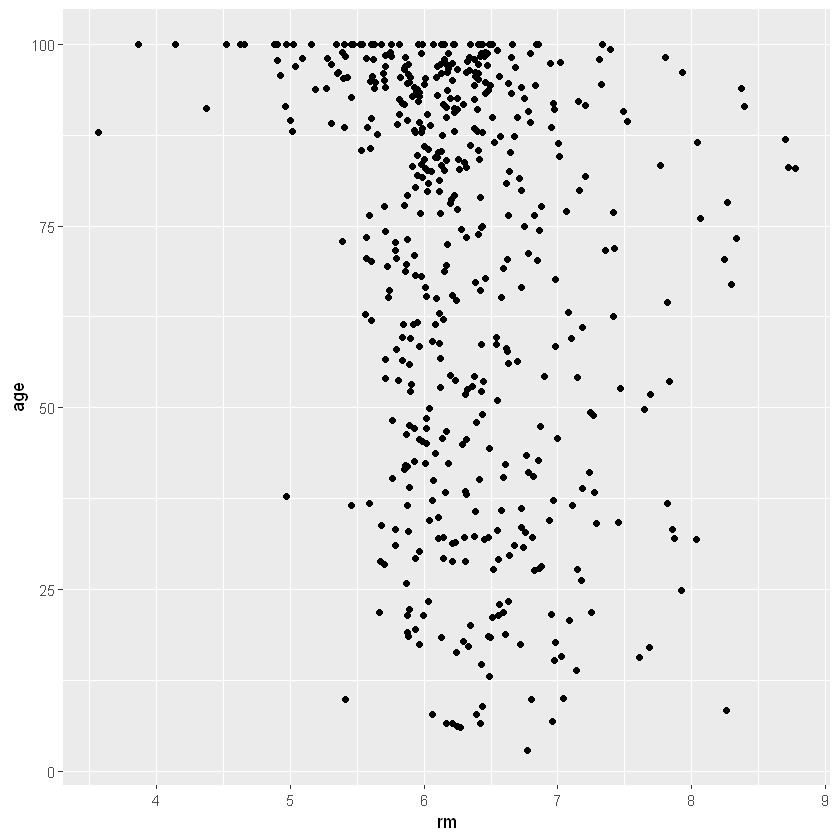

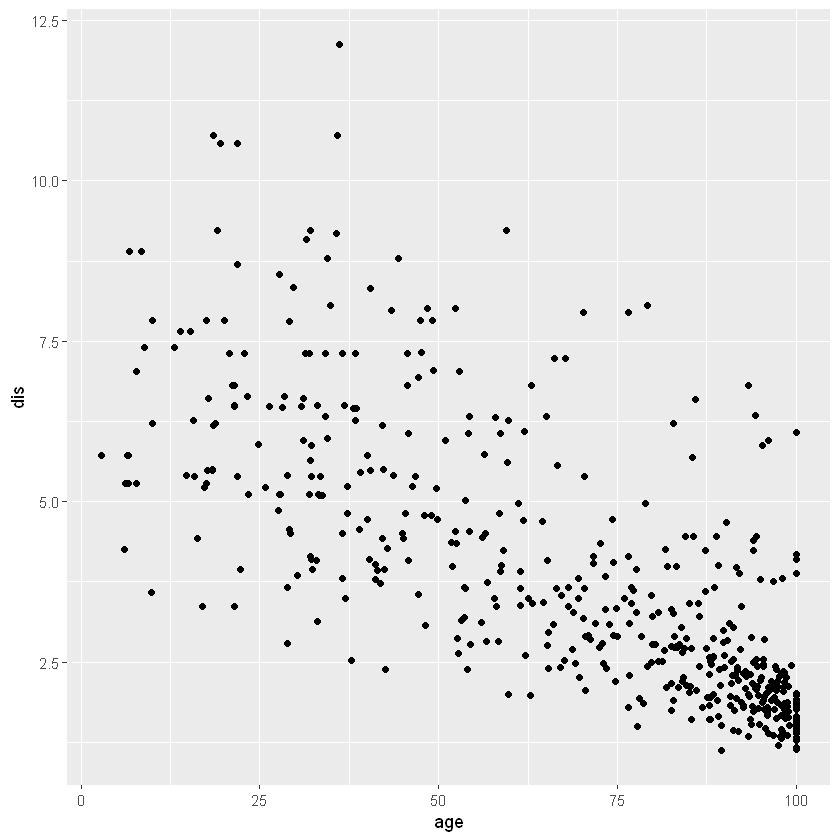

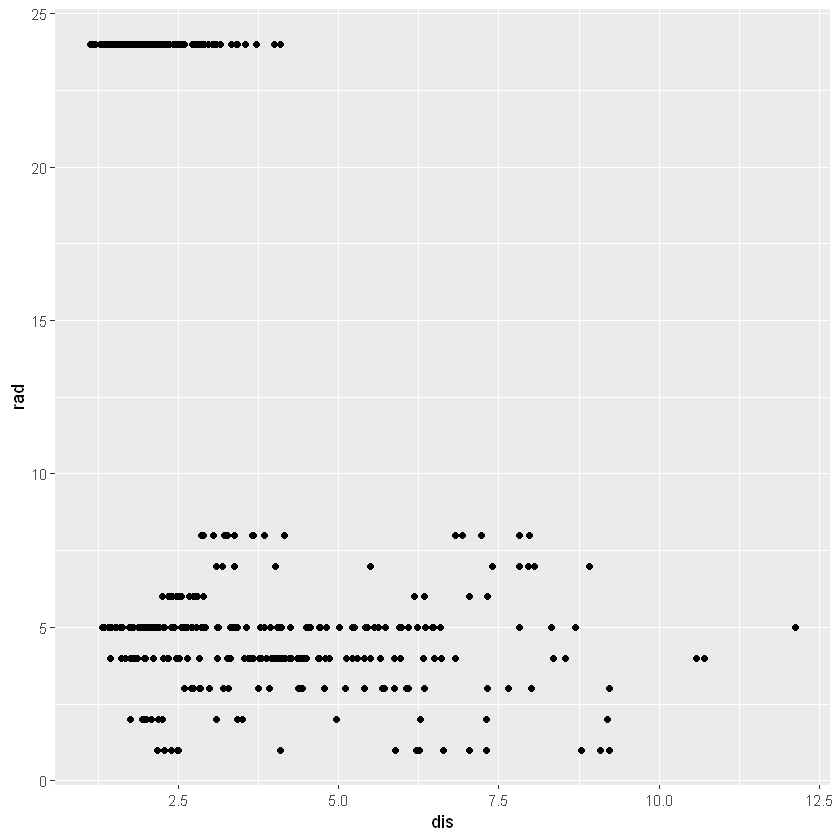

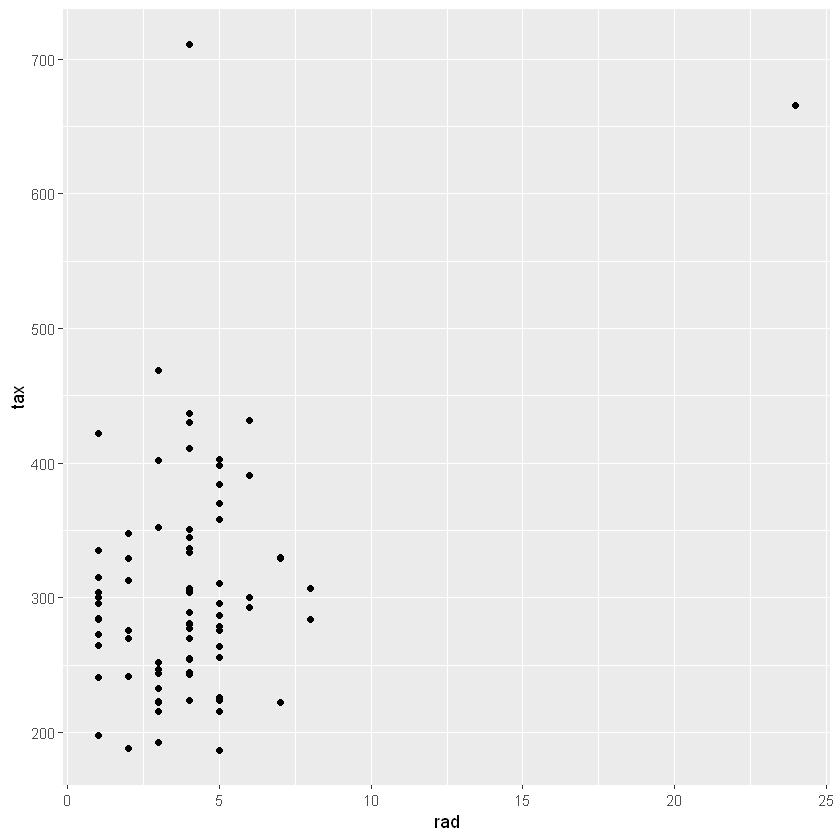

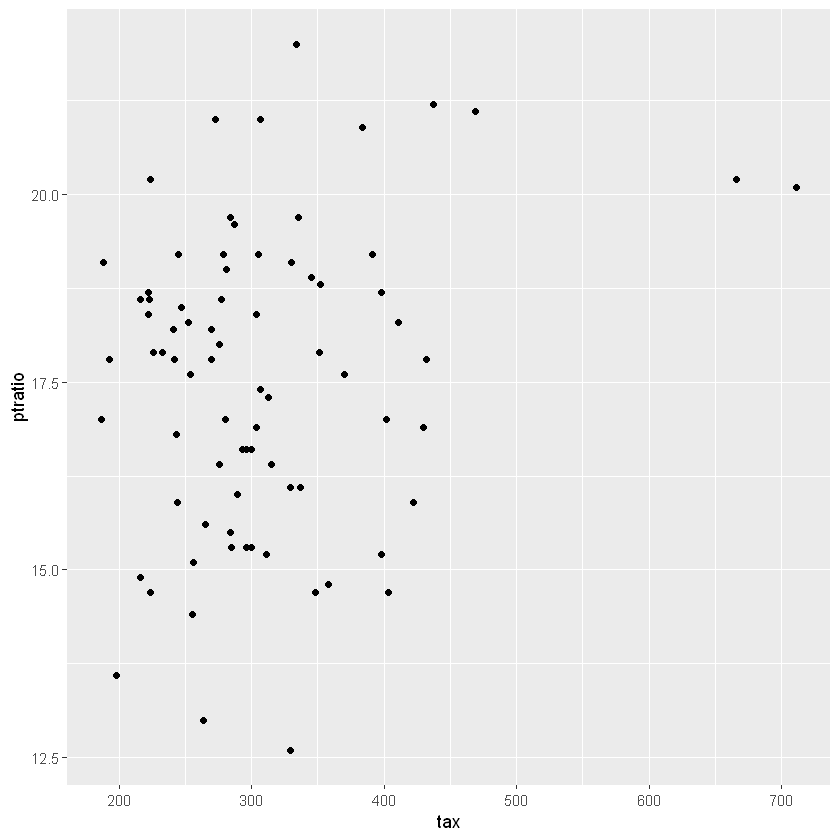

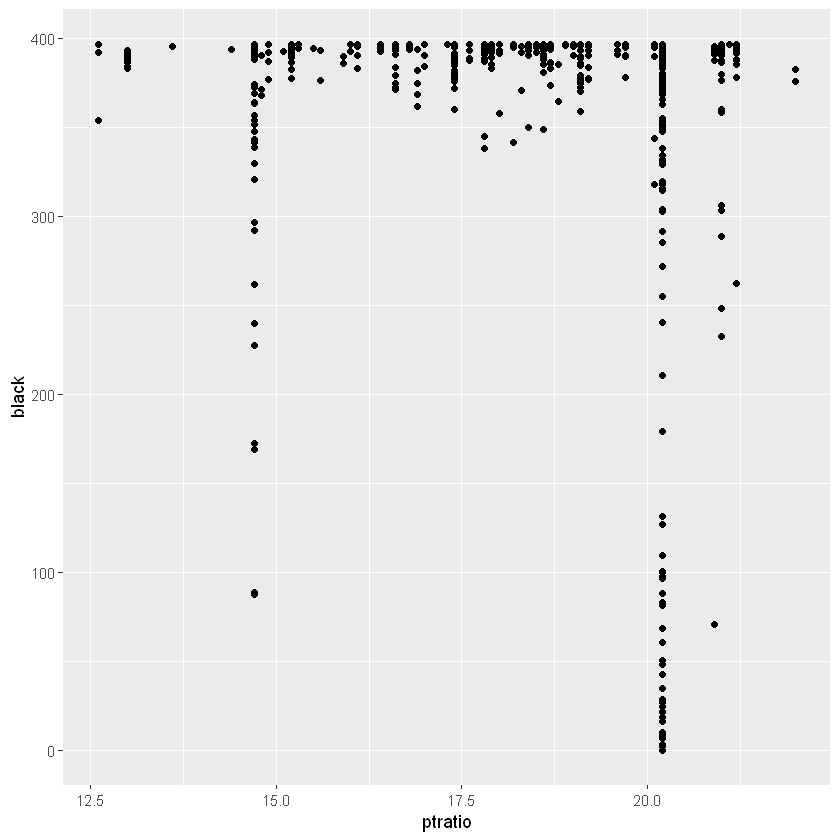

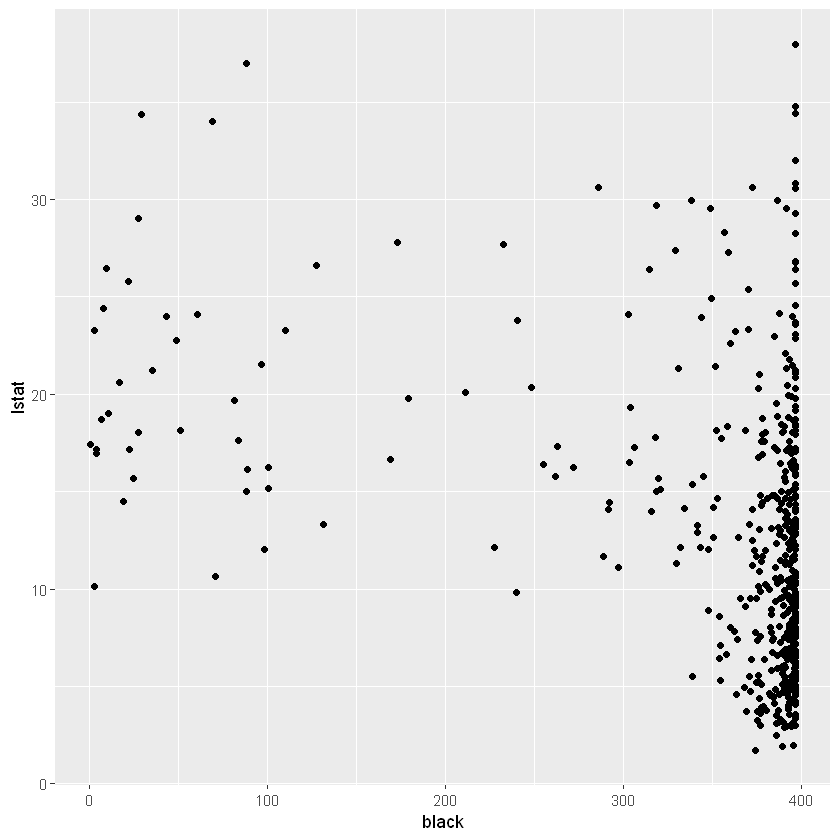

ERROR: Error in `[.data.frame`(Boston, , i + 1): undefined columns selected


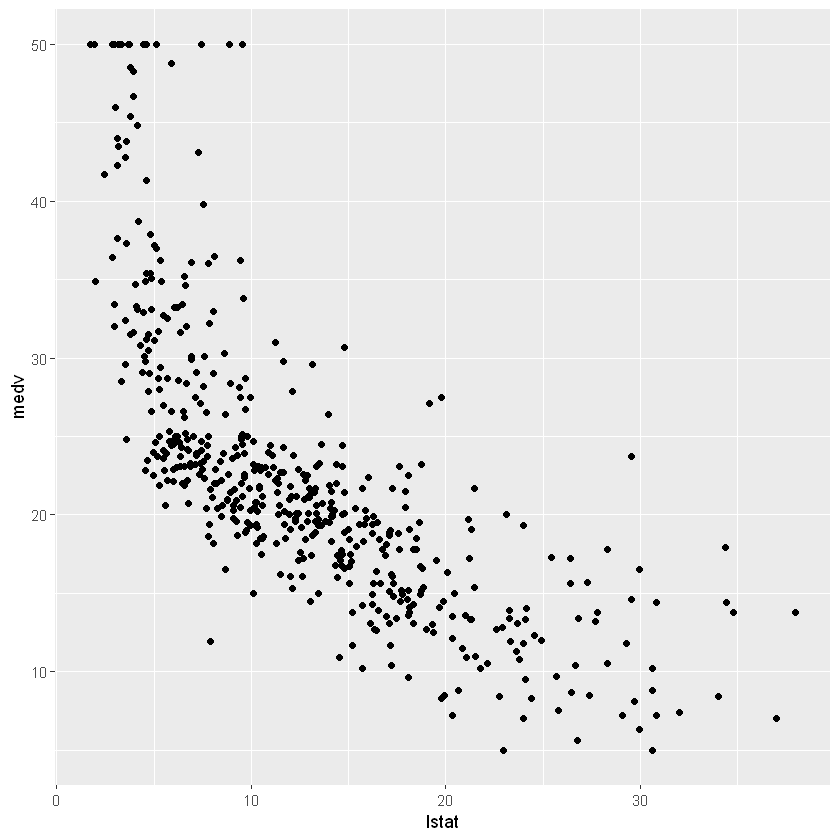

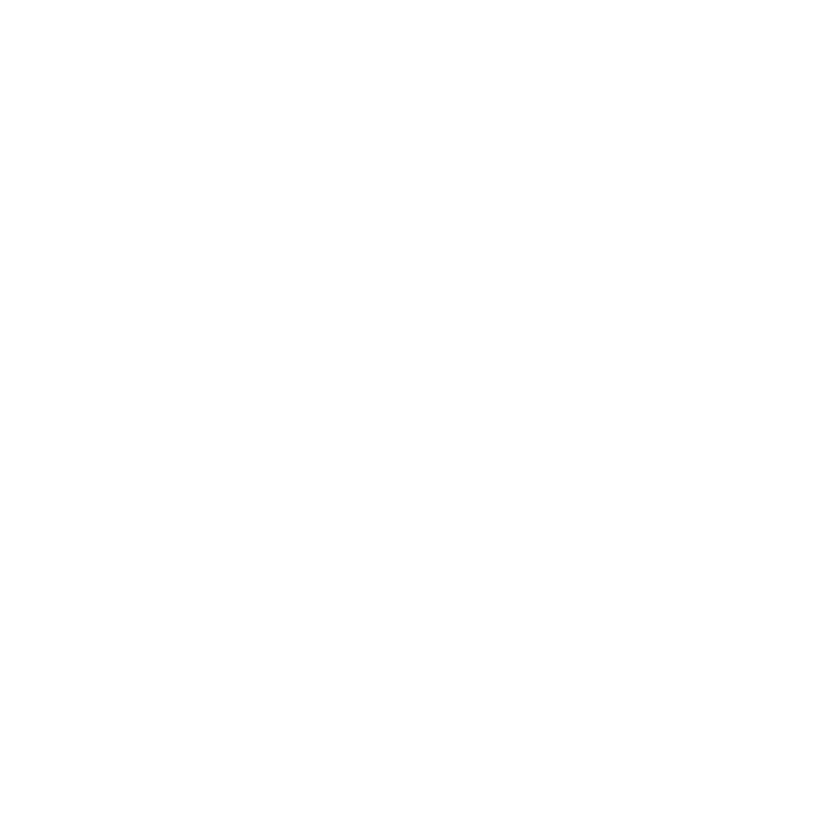

In [4]:
# create pairwise scatter plots of the different columns of in the dataset

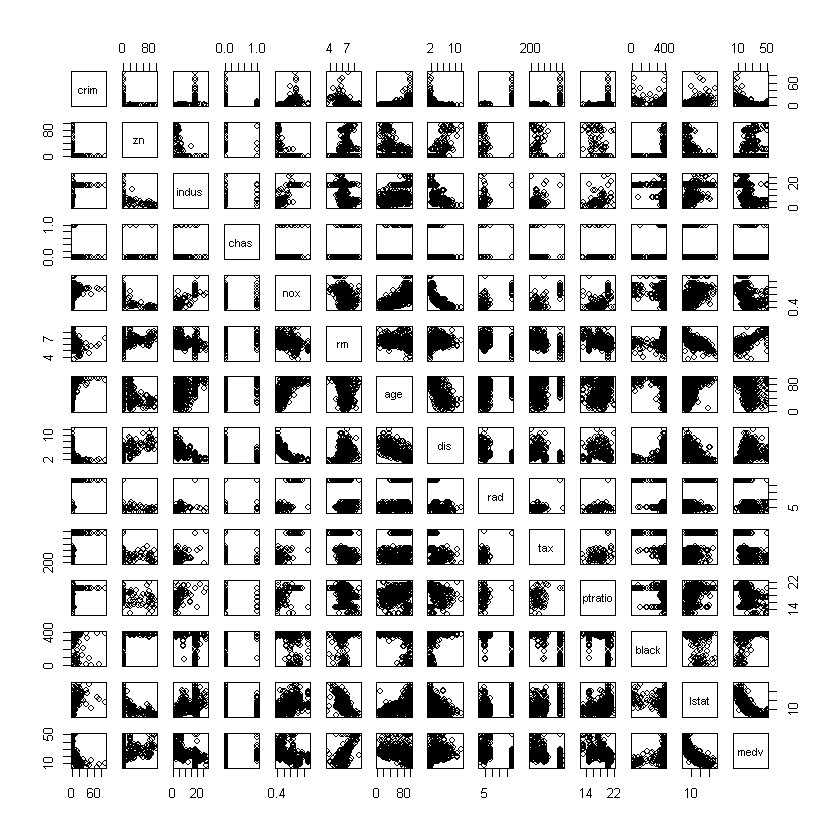

In [5]:
pairs(Boston)

Based on the output of the pairwise scatter plots above, there are discernible relationships between the following quantative variables: 

-`zn` and `crim`: There is close to no correlation between the two variables as crime rate per capita is only above zero for areas with a porportion of residential zonings greater the 25,000 square feet of 0. In other words crime rates above zero are only found in  

-`indus` and `zn`: close to no relationship between these two variables.

-`rm` and `nox`: there is a slight negative correlation between the concentration of nitrogen oxides and the number of rooms per house which makes intuitive sense. 

-`age` and `rm`: the correlation between these variables is negative and not very sigfnificant. However, it's clear by examining the spread of the data that the areas witha very high proportion of owner-occupied residences built befor 1940 tend to have more rooms.

-`age` and `dis`: there is a clear and significant correlation between these variables. As the porportion of owner-occupied residences built before 1940 increase the weighted mean distance to Boston employment centres decreases a negative linear trend. 

-`ptratio` and `tax`: pupil to teacher ratio is positively correlated with full-value property-tax rate per $10,000. 

-`lstat` and `black`: there is a slight negative relationship between the percent of the population of lower status and the porportion of african americans in the town. 

-`medv` and `lstat`: there is a clear and obvious negative correlation between the the percent of lower class individuals in a population and the median value of owner-occupied homes in $1000s.


* c) Are any of the predictors associated with per capita rime rate? If so, explain the relationship.

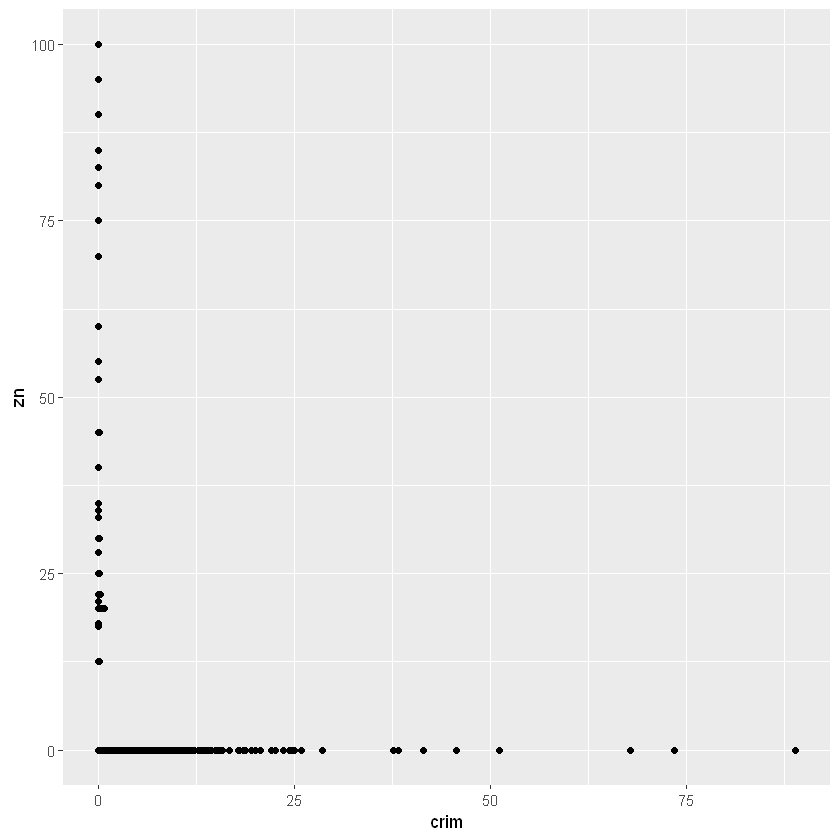

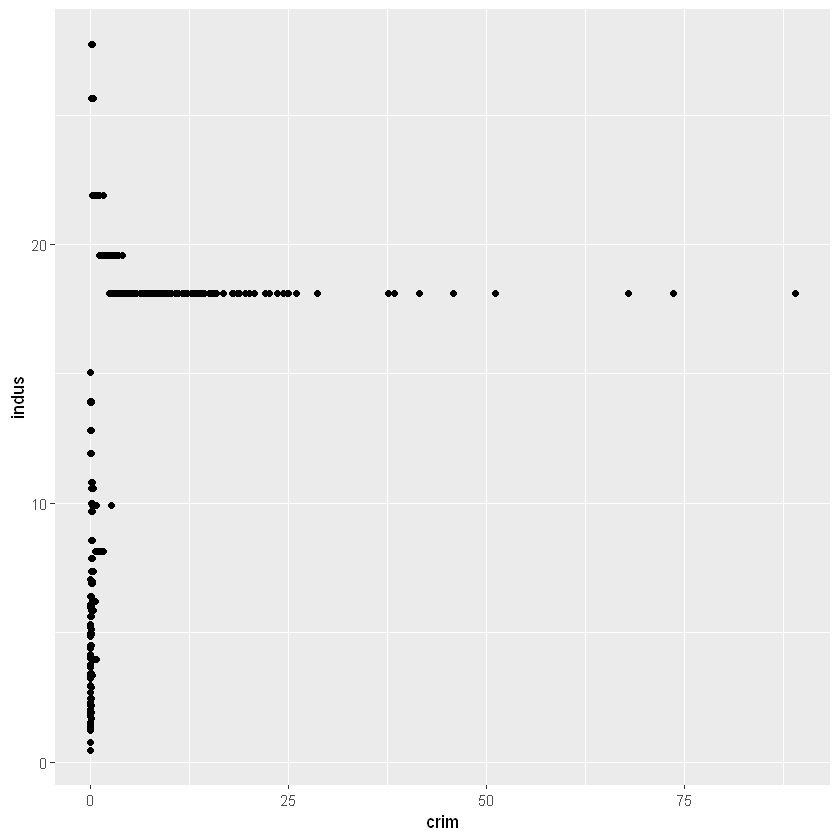

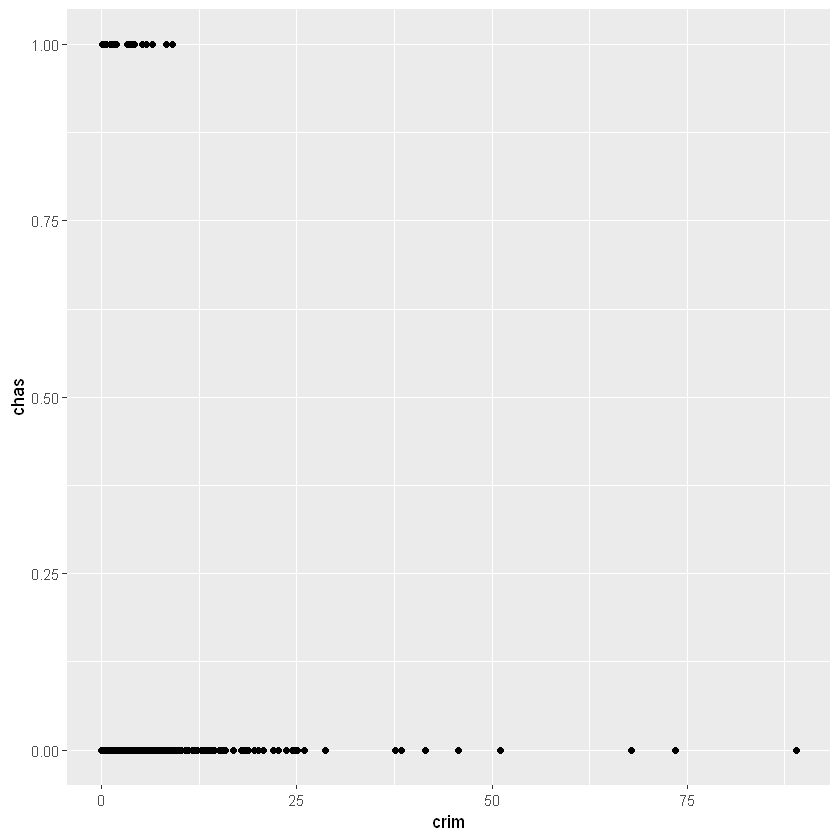

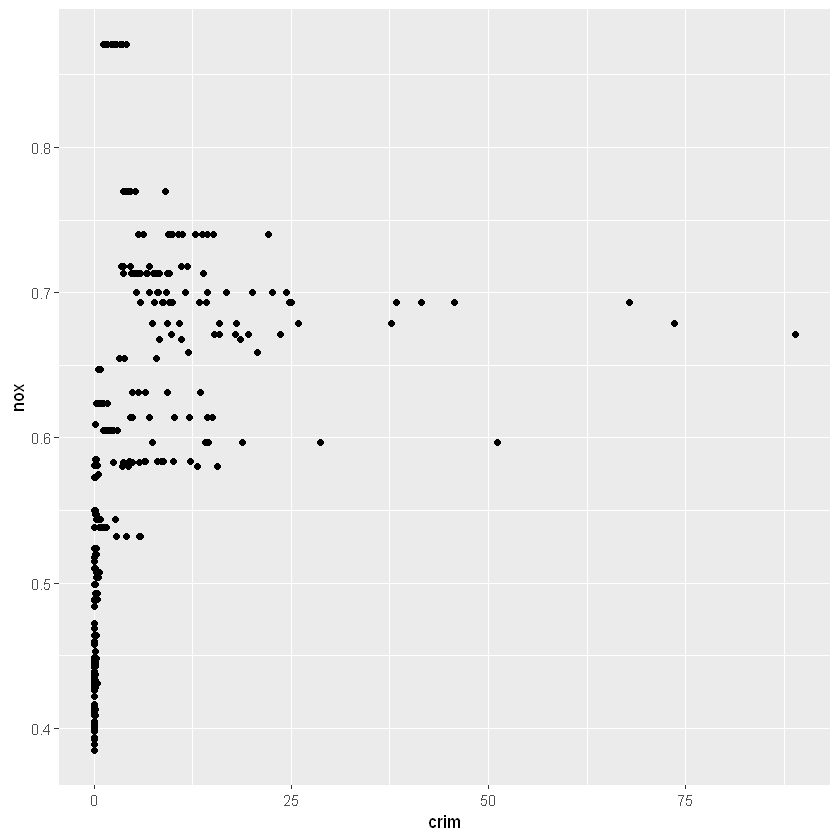

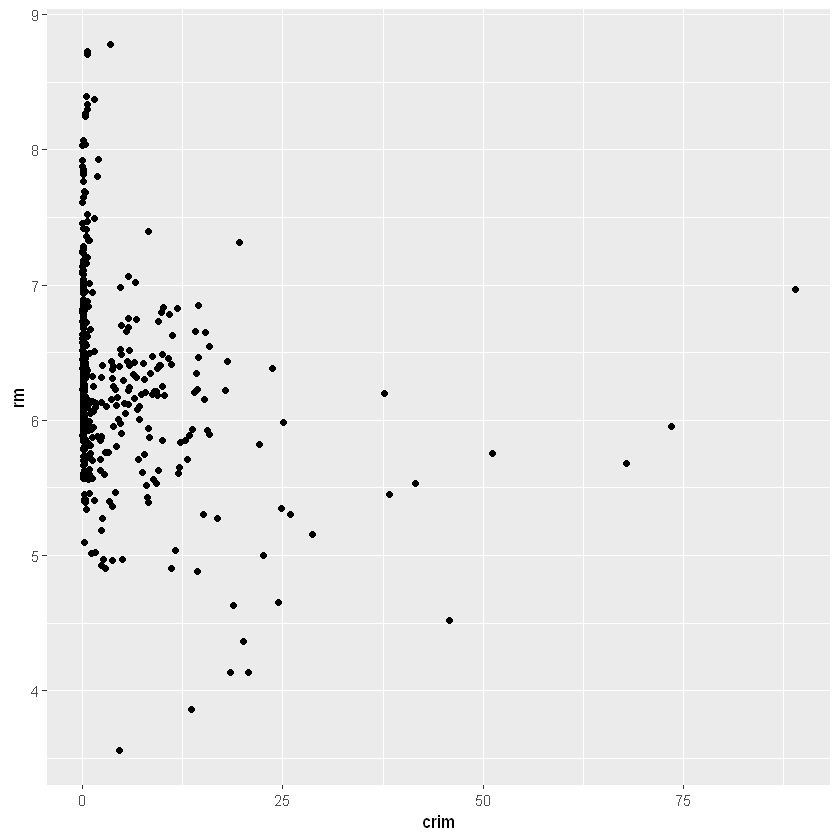

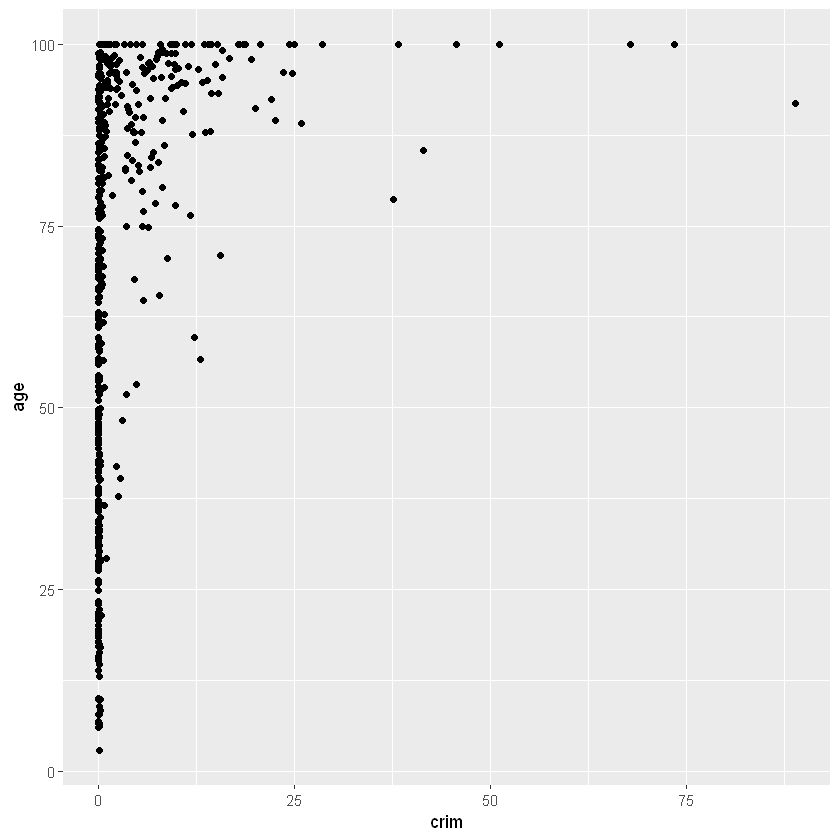

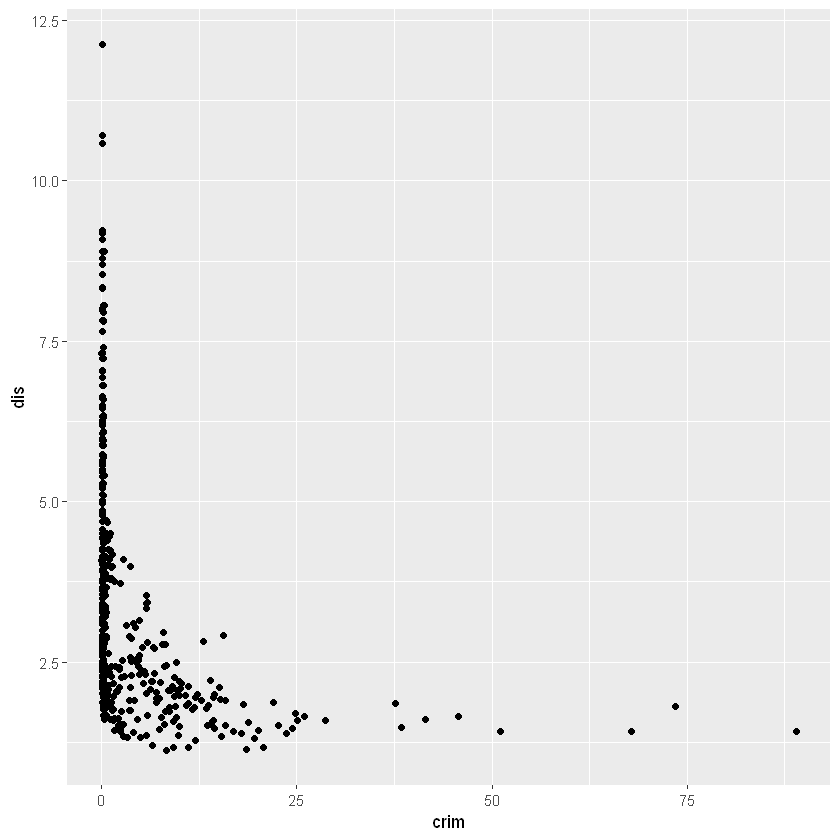

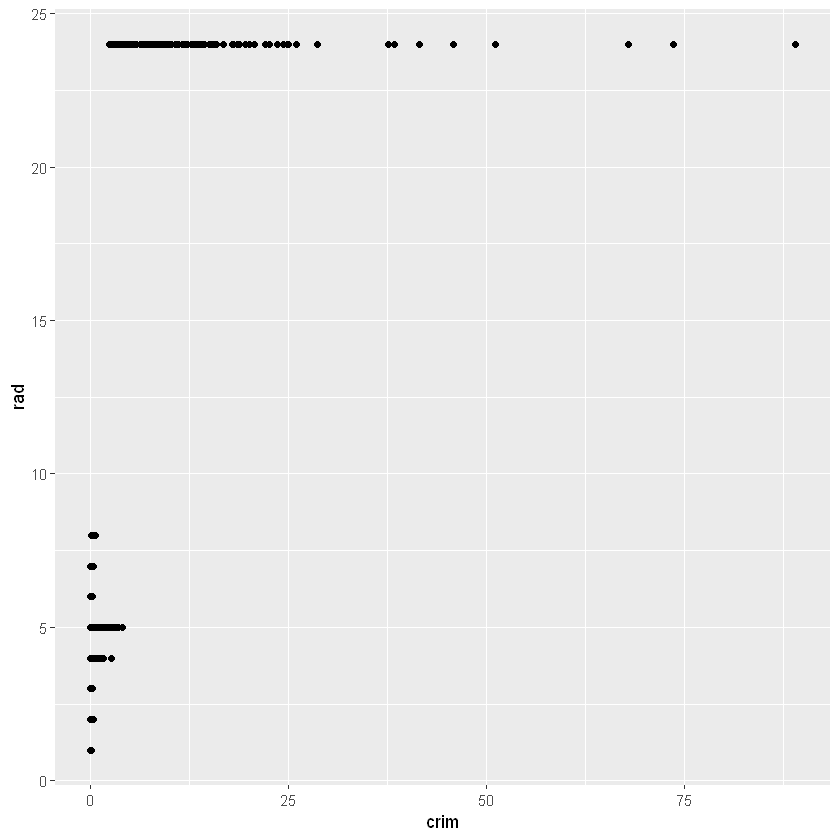

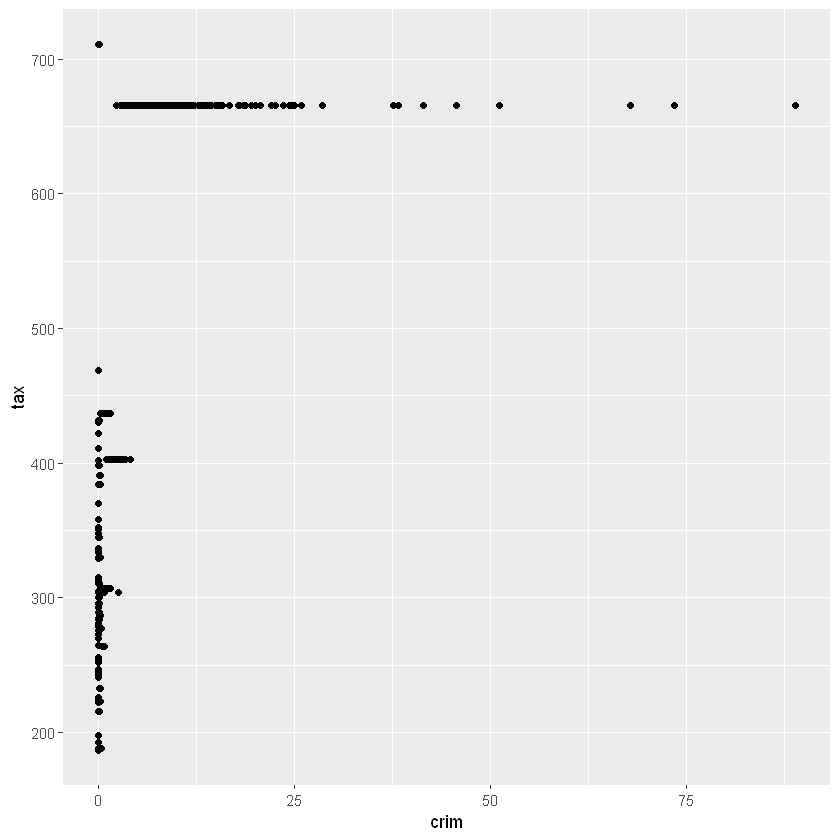

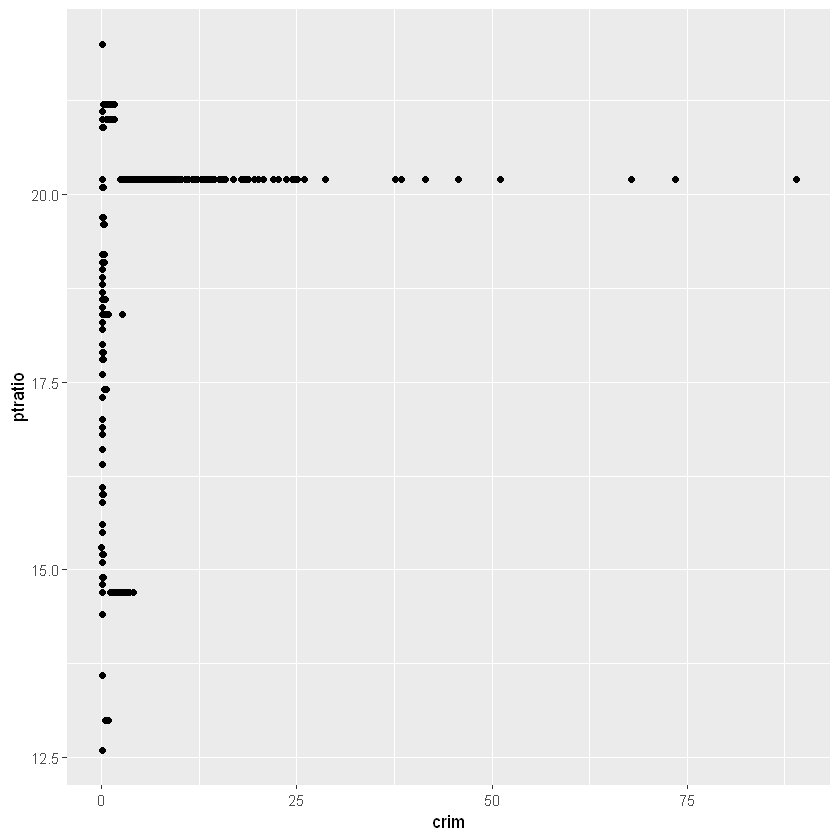

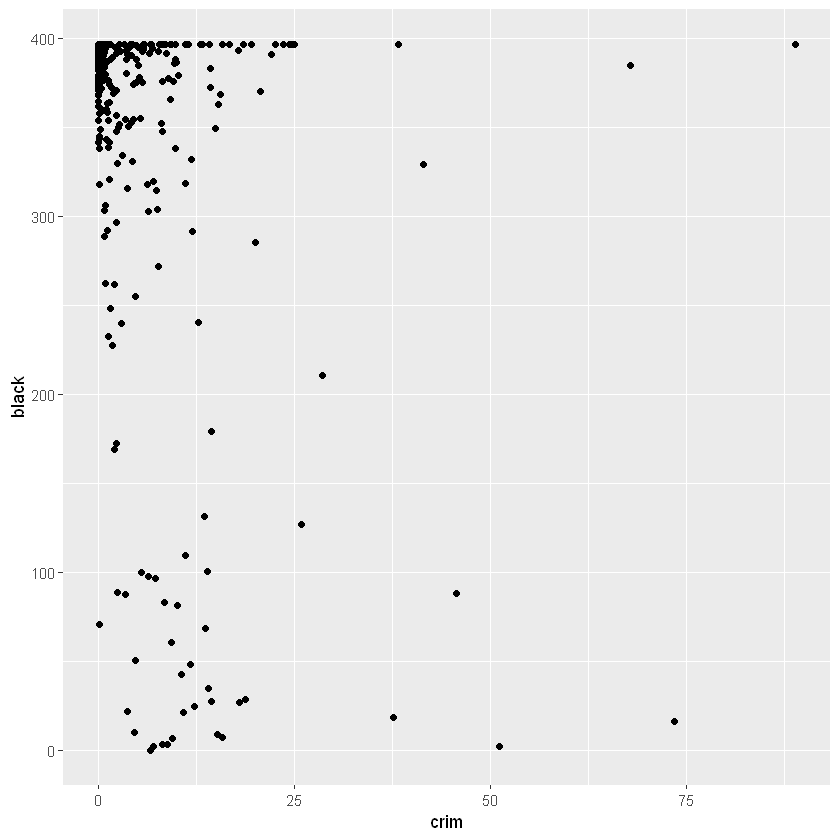

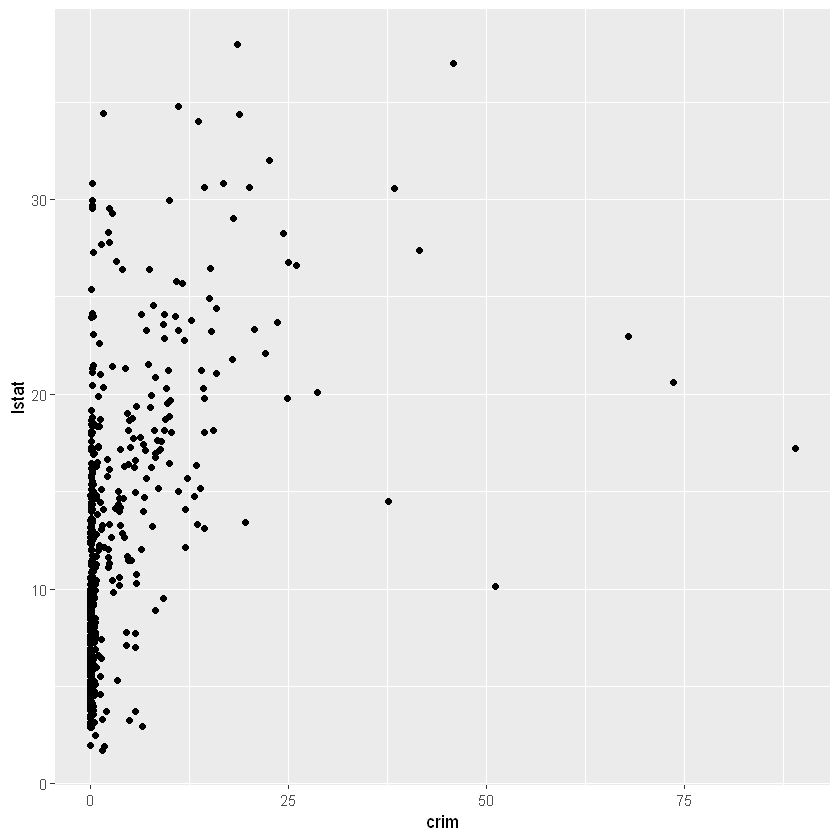

ERROR: Error in `[.data.frame`(Boston, , i + 1): undefined columns selected


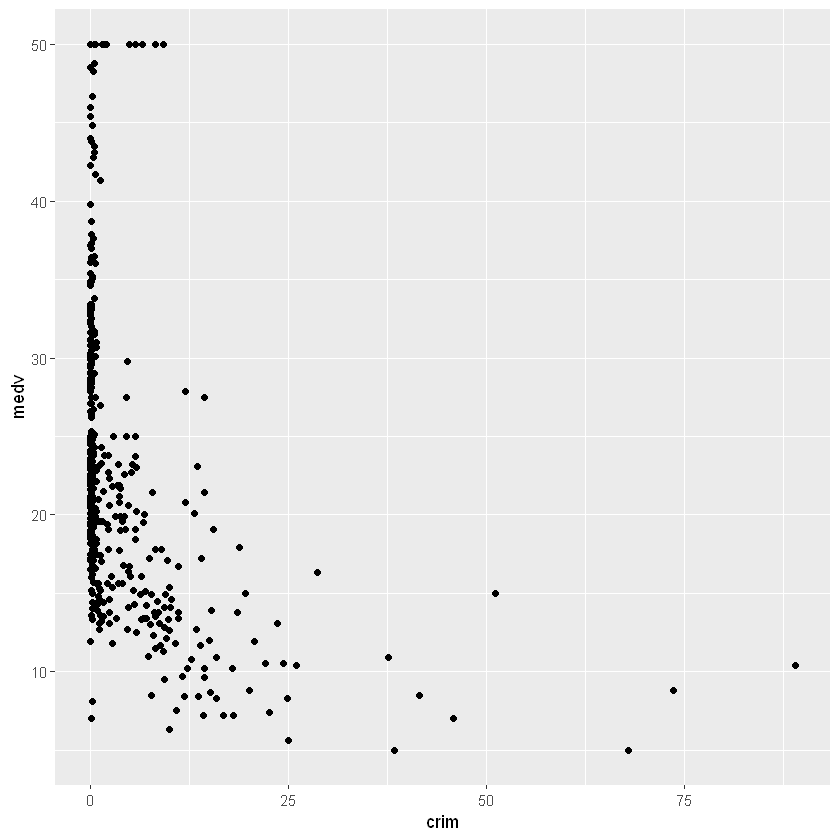

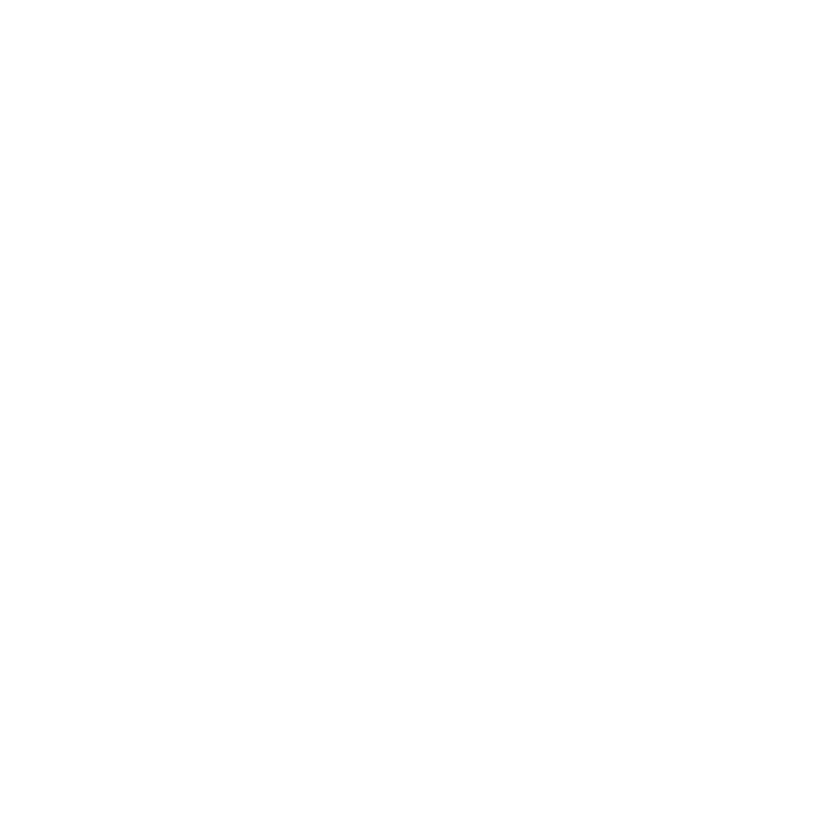

In [4]:
for(i in 1:ncol(Boston)){
print(ggplot(Boston, aes(Boston[,1],Boston[,i+1]))
      + xlab(colnames(Boston)[1]) +
     ylab(colnames(Boston)[i+1]) +
      geom_point())
}

In [5]:
corrVec = c()
for(i in 1:ncol(Boston)){
correlation = cor(Boston[,1],Boston[,i+1])
corrVec = c(corrVec,list((correlation),(colnames(Boston)[i+1])))
print(sprintf("% s to %s to % f", colnames(Boston)[1], colnames(Boston)[i+1], correlation))
}

[1] "crim to zn to -0.200469"
[1] "crim to indus to  0.406583"
[1] "crim to chas to -0.055892"
[1] "crim to nox to  0.420972"
[1] "crim to rm to -0.219247"
[1] "crim to age to  0.352734"
[1] "crim to dis to -0.379670"
[1] "crim to rad to  0.625505"
[1] "crim to tax to  0.582764"
[1] "crim to ptratio to  0.289946"
[1] "crim to black to -0.385064"
[1] "crim to lstat to  0.455621"
[1] "crim to medv to -0.388305"


ERROR: Error in `[.data.frame`(Boston, , i + 1): undefined columns selected


correlation

Using the threshold of a correlation with an absolute value greater than .4, the following variables have a relationship with per capita crime rate: 

-`ìndus`(proportion of non-retail business acres per town): Below an Indus proportion of 20 there is no clear relationship with crime rate, however, once Indus reaches around 20 crime-rate per capita spikes and there is a high concentration of datapoints here. There are also some very extreme outliers just below a porportion of 20. 

-`nox`(nitrogen oxides concentration (parts per 10 million): There is a postive relationship between the two variables. Around a nox of 0.54 there begins to be variance in crim as it increases in this area. 

-`rad`(index of accessibility to radial highways.): There is a somewhat strong positive relationship between these two variables (0.625505). However, upon further inspection of the scatter plot, it appears rad is discrete and the vast majority of observations is in the 24 index. This index has a very high crime-rate per-capita. 

-`tax`(full-value property-tax rate per $10,000): There is also a significant positive relationship between these two variables. By observing the scatter plot it's visible that the majority of the spread of crim is concentrated in the high-value area of tax around 700. Here is where there's a high concentration of high crim.

-`lstat`(lower status of the population (percent)): There's a somewhat weak positive relationship between these two variables. Although this looks to be largely due to the overall population in the dataset belonging to area with low percentages of low-status individuals. However for the observations that are in the upper quantile in terms of percentage of low-status individuals, the spread of crim rate is much higher with some extreme outliers. 



$stats
        [,1] [,2]  [,3] [,4]  [,5]   [,6]  [,7]    [,8] [,9] [,10] [,11]  [,12]
[1,] 0.00632  0.0  0.46    0 0.385 4.8800   2.9 1.12960    1   187 13.60 344.05
[2,] 0.08199  0.0  5.19    0 0.449 5.8850  45.0 2.10000    4   279 17.40 375.33
[3,] 0.25651  0.0  9.69    0 0.538 6.2085  77.5 3.20745    5   330 19.05 391.44
[4,] 3.67822 12.5 18.10    0 0.624 6.6250  94.1 5.21190   24   666 20.20 396.23
[5,] 8.98296 30.0 27.74    0 0.871 7.6910 100.0 9.22290   24   711 22.00 396.90
     [,13] [,14]
[1,]  1.73   5.0
[2,]  6.93  17.0
[3,] 11.36  21.2
[4,] 16.96  25.0
[5,] 31.99  37.0

$n
 [1] 506 506 506 506 506 506 506 506 506 506 506 506 506 506

$conf
           [,1]       [,2]      [,3] [,4]      [,5]     [,6]     [,7]     [,8]
[1,] 0.00391236 -0.8779946  8.783207    0 0.5257081 6.156523 74.05124 2.988871
[2,] 0.50910764  0.8779946 10.596793    0 0.5502919 6.260477 80.94876 3.426029
         [,9]    [,10]    [,11]   [,12]   [,13]    [,14]
[1,] 3.595209 302.8173 18.85333 389.972 10.65

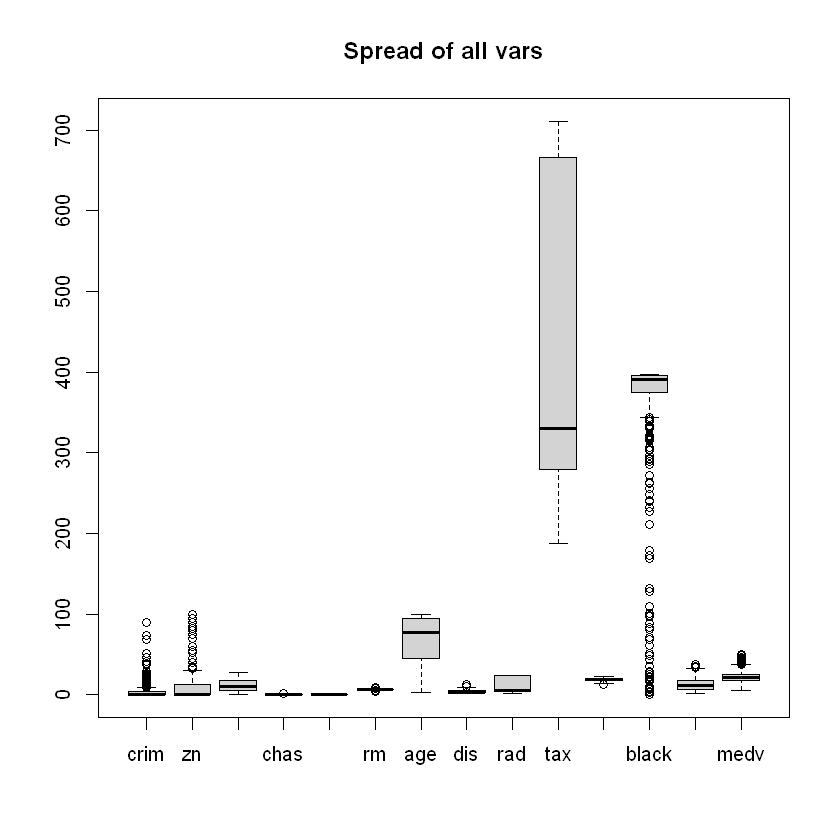

In [6]:
for (i in 1:length(ncol(Boston))){
    print(boxplot(Boston,Boston[,i], main='Spread of all vars', type="l"))
}

* d) Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.

By visualizing the overall spread of each variable in a boxplot, it's clear that there are suburbs in the dataset which have lots of outliers such as: Crime rate per capita, porpotion of residential land zoned for lots over 25,000 sq. ft. and porportion of blacks by town. 

 

In [7]:
rangeVec = c()
for(i in 1:ncol(Boston)){
range = range(Boston[,i])
rangeVec = c(rangeVec,list((range),(colnames(Boston)[i+1])))
print(sprintf("%s is % f", colnames(Boston)[i], range))
}

[1] "crim is  0.006320"  "crim is  88.976200"
[1] "zn is  0.000000"   "zn is  100.000000"
[1] "indus is  0.460000"  "indus is  27.740000"
[1] "chas is  0.000000" "chas is  1.000000"
[1] "nox is  0.385000" "nox is  0.871000"
[1] "rm is  3.561000" "rm is  8.780000"
[1] "age is  2.900000"   "age is  100.000000"
[1] "dis is  1.129600"  "dis is  12.126500"
[1] "rad is  1.000000"  "rad is  24.000000"
[1] "tax is  187.000000" "tax is  711.000000"
[1] "ptratio is  12.600000" "ptratio is  22.000000"
[1] "black is  0.320000"   "black is  396.900000"
[1] "lstat is  1.730000"  "lstat is  37.970000"
[1] "medv is  5.000000"  "medv is  50.000000"


In [ ]:
CharBounded <- Boston %>% group_by(chas) %>%
    summarize(n=n())

print(CharBounded)

In [ ]:
medianPupTeachRatio = median(Boston$ptratio)
print(medianPupTeachRatio)

* e) How many of the suburbs in this data set bound the Charles river?

There are 35 suburbs bound the Charles river and 471 do not. 

* f) What is the median pupil-teacher ratio among the towns in this data set?

The median pupel-teacher ratio amongst suburbs in the Boston dataset is 19.05. 

In [ ]:
subset(Boston, medv == min(Boston$medv))

In [ ]:
varMeans = c()
for(i in 1:ncol(Boston)){
varMeans = c(varMeans,mean(Boston[,i]))
}

BostonColNames = colnames(Boston)

BostonVarMeans = cbind(BostonColNames,varMeans)

In [ ]:
BostonVarMeans

* g) Which suburb of Boston has lowest median value of owneroccupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings.

It's clear by comparing the predictors of the two suburbs with the lowest `medv` values with averages of each predictor for the whole data set that these suburb's predictors are outliers within the dataset. `crim` is extremely high (38.35 and 67.9) compared to the dataset's average of 3.6. `zn` is very low compartively at 0 for both suburbs compared to an average of 11.36. `indus` is relatively high at 18.1 compared to the average of 11.13. `chas` is 0 not far from the dataset's average of 0.069. `nox` (0.69) is higher than the average of 0.55. `rm` (5.453 and 5.683) fall below the average of 6.28. `age` is far above the average of 68.57 at 100. `dis` (1.4896 and 1.4254) fall below the average of 3.795. Rad (24 and 24) exceed the average of 9.5 significantly. `tax` (666 and 666) greatly exceed the average of 408.23. `ptratio` (20.2) is just above the average of 18.45. `black` (396.90 and 384.97) both exceed the average of 356.67. `lstat` (30.59 and 22.98) both exceed the average of 12.65. Finally, `medv` (5 and 5) are the smallest in the dataset and fall signficantly below the average of 22.53.

In [ ]:
sum(Boston$rm > 7)

In [ ]:
sum(Boston$rm > 8)

In [ ]:
summary(Boston[Boston$rm > 8,])

In [ ]:
summary(Boston[Boston$rm > 7,])

* h) These suburbs consist of upperclass dwellings. This is visible by the relatively low `lstat` and `crim` values and the high `medv` values. 

## 3.7 Exercises

# 3) 

* (a) Which answer is correct, and why?
        
        i. For a fixed value of IQ and GPA, males earn more on average than females.
        
False, due to the binary variable gender, females will make more money on average because the dummy variable is multiplied by the gender coefficientof 35 adding to the response. 
        
        ii. For a fixed value of IQ and GPA, females earn more on average than males.
        
True, this is true for the opposite reason as mentioned in the previous question. 
        
        iii. For a fixed value of IQ and GPA, males earn more on average than females provided that the GPA is high enough.
        
True, once gpa reaches the value of 3.5 females no longer make more on average. 
        
        iv. For a fixed value of IQ and GPA, females earn more on average than males provided that the GPA is high enough.
        
False, the opposite is true. WHile GPA is below 3.5 females make more on average. 


* (b) Predict the salary of a female with IQ of 110 and a GPA of 4.0.
    
     $\hat{Y} = 50 + (20 * 4) + (0.07 * 110) + (35 * 1) + (0.01 * 4.0 * 10) - (10 * 4 * 1) = 137.1 
     
     The salary of the female would be $137,100. 

* (c) True or false: Since the coefficient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect. Justify your answer.


False, the magnitude of an interaction term is not indicative of whether there should be an interaction term. Instead visualizing the predictors to see if they run parallel and p-value significance can tell us whether there should be an interaction term present. 

# 10) 

In [ ]:
data('Carseats')
head(Carseats)

* a) Fit a multiple regression model to predict Sales using Price, Urban, and US.

In [ ]:
# Fit a multiple regression model to predict Sales using Price, Urban, and US.
lm <- lm(Sales ~ Price + Urban + US, data = Carseats)

In [ ]:
summary(lm)

* b) Provide an interpretation of each coefficient in the model. Be careful -- some of the variables in the model are qualitative. 

Intercept: The regression line begins at 13.04 on the y-axis. 

Price: With all other predictors held constant, an increase in price of one will result in a change of Sales of -0.054. This predictors p-value is significant so we can safely assume that there is a actually a relationship with ther response Sales.

Urban: This predictor is a qualitative variable, when all other predictors are held constant, if the categorical value of Urban is 1 meaning that it is in an urban area, the effect on the response is -0.02. However, the high p-value does not allow us to reject the null hypothesis that this predictor has no true relationship to Sales. 

US: This predictor is also qualitative, when a store is in the US the effect on the response is 1.2. The p-value is also significant meaning we can reject the hypothesis that there is no true relationship between US and Sales. 

* c) Write out the model in equation form, being careful to handle the qualitative variables properly. 

$\hat{Y} = 13.043469 + -0.054459 * Price + -0.021916 * Urban (1 or 0) + 1.200573 * US (1 or 0)

* d) For which of the predictors can you reject the null hypothesis? 

Considering the P-value of the predictor Urban is not significant (< 0.05), we can cannot reject the null hypothesis that its coefficient is equal to 0. 

* e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome. 

In [ ]:
lmSignificant <- lm(Sales ~ Price + US, data = Carseats)

In [ ]:
summary(lmSignificant)

* f) How well do the models in (a) and (e) fit the data? 

    The R Squared is the measure for how much variance in the response is explained by the predictors in the model. Therefore, we'll use it to assess how well the model fits the data. For model (a) the adjusted R squared is 0.2335 meaning 23.35% of the variance in Sales is explained by the predictors. For model (b), the adjusted R squared is 0.2354. Therefore, both models fit the data poorly and explain almost the exact same amount of variance in the response. 

* g) Using the model from (e), obtain 95% confidence intervals for the coefficients. 

In [ ]:
 confint(lmSignificant, level=0.95)

* h) Is there evidence of outliers or high leverage observations in the model from (e)? 

In [ ]:
if (!require("car")) {
    install.packages("car")
    library(ggplot2)
}

#apply outlierTest function from the car package to check for outliers 
outlierTest(lmSignificant)

In [ ]:
#I didn't write this function
#source: https://towardsdatascience.com/how-to-detect-unusual-observations-on-your-regression-model-with-r-de0eaa38bc5b

highleverage <- function(fit) {
 p <- length(coefficients(fit))
 n <- length(fitted(fit))
 ratio <-p/n
 plot(hatvalues(fit), main="Index Plot of Ratio")
 abline(h=c(2,3)*ratio, col="red", lty=2)
 identify(1:n, hatvalues(fit), names(hatvalues(fit)))
}
highleverage(lmSignificant)

From the plot above it's clear that there are a handful of high-leverage data points in the dataset. 

# 15) 

* a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the presponse? Create some plots to back up your assertions. 

In [ ]:
names(Boston)

In [ ]:
#create a new dataframe excluding crim 
BostonNoCrim = Boston[,-1]


for(i in 1:ncol(BostonNoCrim)){
    lm <- lm(crim ~ Boston[,i +1], data = Boston)
    print(paste("Predictor: ",colnames(BostonNoCrim)[i]))
    print(summary(lm))
}

After examining each respective linear regression, the following predictors have a statistically significant assocation with the response:

- `zn`, `indus`, `nox`, `rm`, `àge`, `dis`, `rad`, `tax`, `ptratio`, `black`,`lstat`, and `medv`. 

Each predictors relationship can be visualized using a scatter plot.

* b) Fit a multiple regression model to predict the response using all of thepredictors. Describe your results. For which predictors can we reject the null hypothesis. 

In [9]:
lmBoston =  lm(crim ~ ., data = Boston)
summary(lmBoston)


Call:
lm(formula = crim ~ ., data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-9.924 -2.120 -0.353  1.019 75.051 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  17.033228   7.234903   2.354 0.018949 *  
zn            0.044855   0.018734   2.394 0.017025 *  
indus        -0.063855   0.083407  -0.766 0.444294    
chas         -0.749134   1.180147  -0.635 0.525867    
nox         -10.313535   5.275536  -1.955 0.051152 .  
rm            0.430131   0.612830   0.702 0.483089    
age           0.001452   0.017925   0.081 0.935488    
dis          -0.987176   0.281817  -3.503 0.000502 ***
rad           0.588209   0.088049   6.680 6.46e-11 ***
tax          -0.003780   0.005156  -0.733 0.463793    
ptratio      -0.271081   0.186450  -1.454 0.146611    
black        -0.007538   0.003673  -2.052 0.040702 *  
lstat         0.126211   0.075725   1.667 0.096208 .  
medv         -0.198887   0.060516  -3.287 0.001087 ** 
---
Signif. codes:  0 '***' 0.0

The resulting multiple regression model has an adjusted R-squared of 0.4396. Meaning 44% of the variance in `crim` is explained by the predictors. The following variables have significant P-values: 
-`zn`, `dis`,`rad`,`black`, and `medv`